In [2]:
import sys, re, os
import numpy as np
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, classification_report,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [5]:
chdir = True

In [6]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [7]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [8]:
# Metadata for specific SFC configurations

exp_ls = 'random_rate'
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

In [9]:
current_dir = os.getcwd()

file_path = os.path.abspath('../linear/datasets/random_rates.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 0 to 21980
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          21981 non-null  float64
 1   output_rate                         21981 non-null  float64
 2   latency                             21981 non-null  float64
 3   firewall_instructions               21981 non-null  float64
 4   nf_router_instructions              21981 non-null  float64
 5   ndpi_stats_instructions             21981 non-null  float64
 6   payload_scan_instructions           21981 non-null  float64
 7   bridge_instructions                 21981 non-null  float64
 8   firewall_branches                   21981 non-null  float64
 9   nf_router_branches                  21981 non-null  float64
 10  ndpi_stats_branches                 21981 non-null  float64
 11  payload_scan_branches               21981

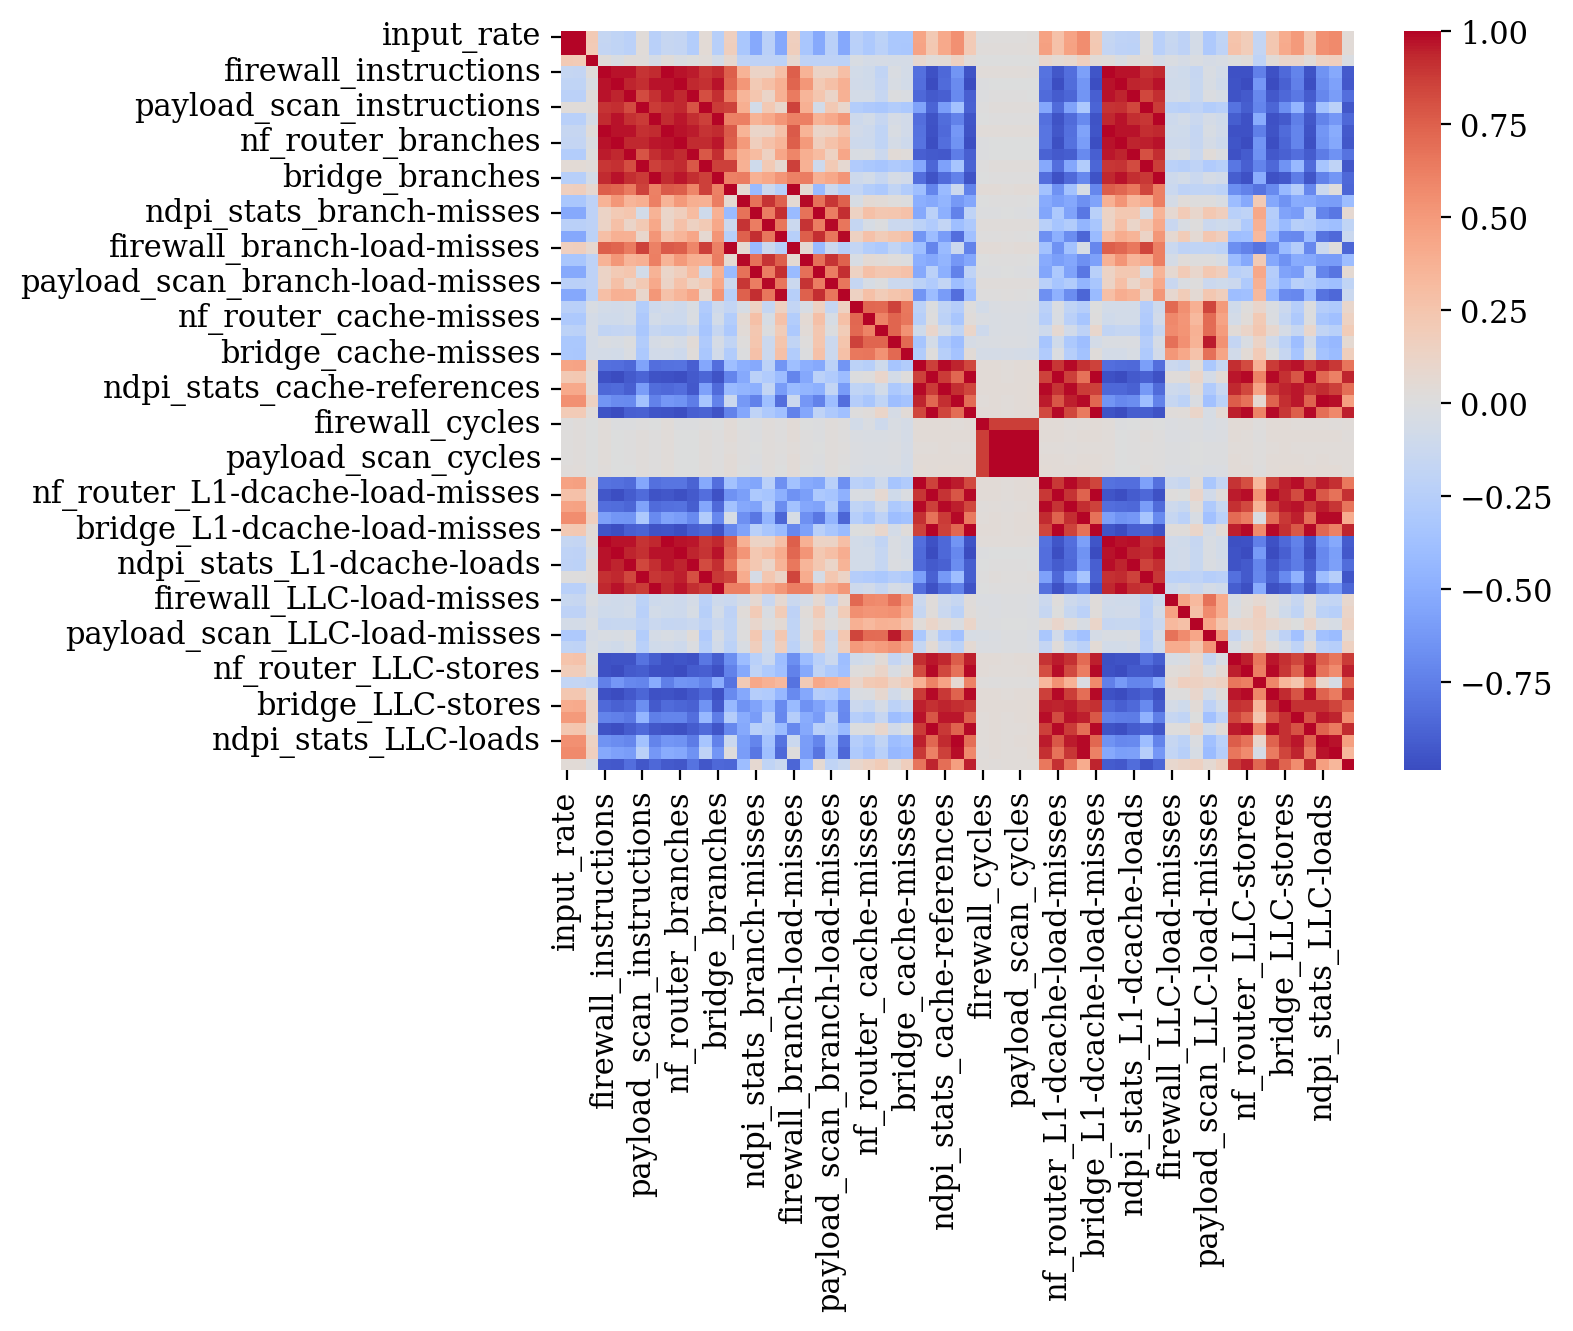

In [10]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

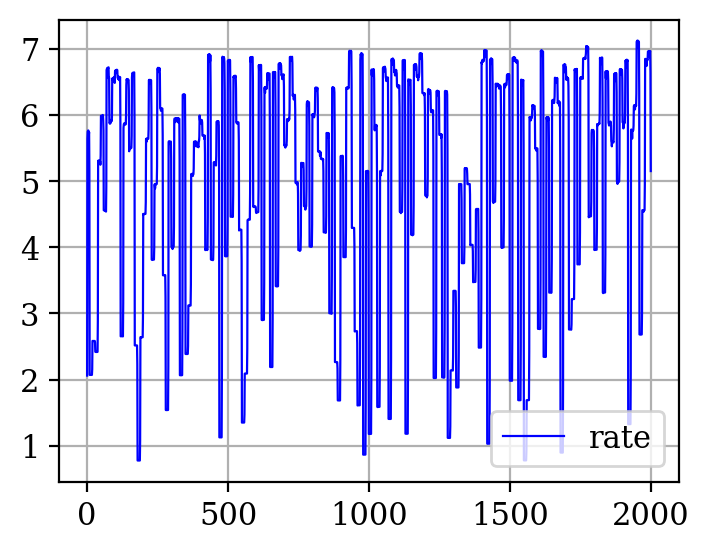

4.557533720258471
0.64956534194572
7.123542516256499


In [11]:
# input rate distribution

a = list(data['input_rate']/1000)

fig,ax=plt.subplots(figsize=(4,3),facecolor='white')
plt.plot(a[0:2000], c='b', label='rate',linewidth=0.8)
plt.legend()
plt.grid()
plt.show()
print(sum(a)/len(a))
print(min(a))
print(max(a))

# Rate prediction

In [12]:
# data
df = data.dropna()
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the regressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

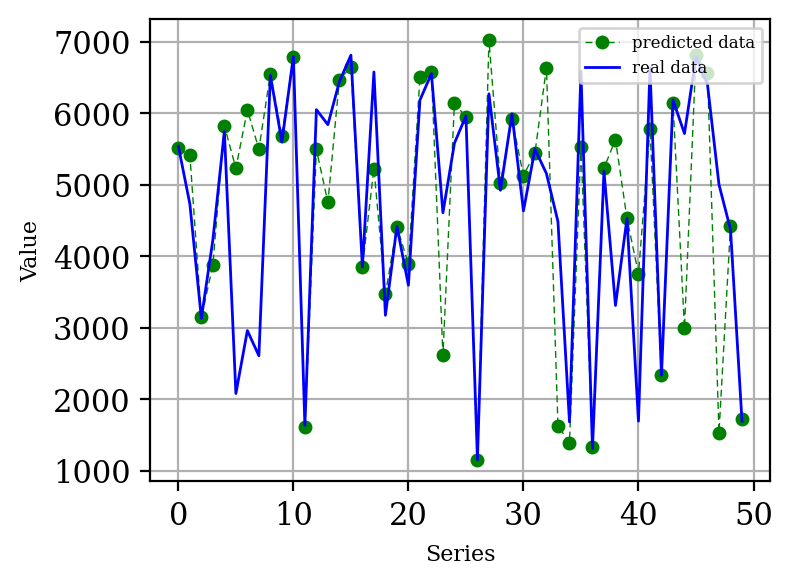

Accuracy within 5% threshold: 40.45489006823351
[0.0, 48.551933282789996, 57.8316906747536, 64.50341167551174, 70.26535253980288, 75.23881728582259, 79.37831690674754, 82.91129643669447, 86.61106899166035, 89.24943138741472, 89.99241849886278]


In [13]:
# Make predictions on the test set
y_pred = reg.predict(X_test)


# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# plot
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.5, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series', fontsize=8)
plt.ylabel('Value', fontsize=8)
plt.grid()

#save figure
folder_path = 'figure/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'predic_rate_random.png')
plt.savefig(file_path)
plt.show()

# accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
accuracy_partical_cdf=[]

# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

C:\Users\Qiong\AppData\Local\Temp\ipykernel_5224\3546327708.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


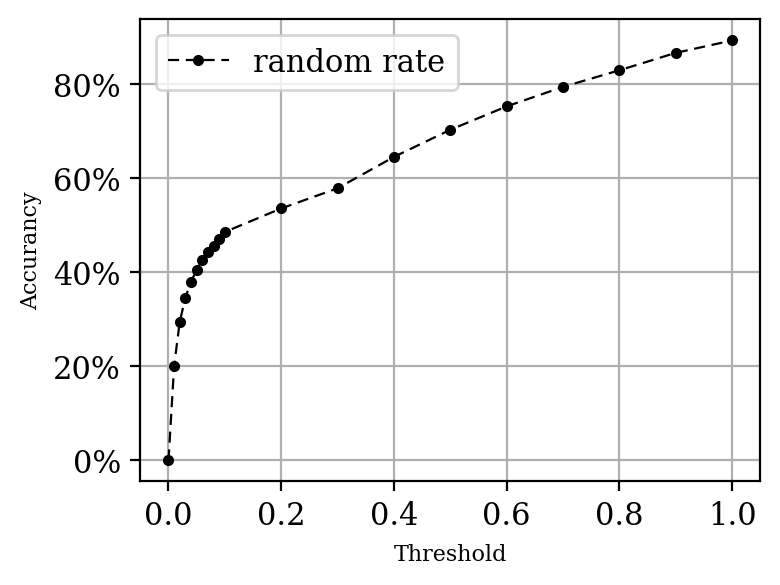

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Example real data and predicted data
fig, ax = plt.subplots(figsize=(4,3))  
b = [item/100 for item in range(10)]+[item/10 for item in range(1,11)]
accurancy_random=[0.0, 20.1213040181956, 29.492039423805917, 34.60197119029568, 
                   38.013646702047005, 40.45489006823351, 42.66868840030326, 44.29112964366945, 
                   45.57998483699773, 47.05079605761941, 48.551933282789996, 53.551933282789996,
                   57.8316906747536, 64.50341167551174, 70.26535253980288, 
                  75.23881728582259, 79.37831690674754, 82.91129643669447, 86.61106899166035, 
                  89.24943138741472]
accurancy = [0.0, 87.03703703703704, 96.29629629629629, 96.29629629629629, 96.29629629629629, 
             96.29629629629629, 96.29629629629629, 96.29629629629629, 
             96.29629629629629, 96.29629629629629]

#plot
plt.plot(b,accurancy_random, marker='o',markersize = 3, c='k',linestyle='-',linewidth=0.8, dashes=(5, 3),label = 'random rate')  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold', fontsize=8)
plt.ylabel('Accurancy', fontsize=8)
plt.legend()
plt.grid()
plt.show()

C:\Users\Qiong\AppData\Local\Temp\ipykernel_5224\117643574.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


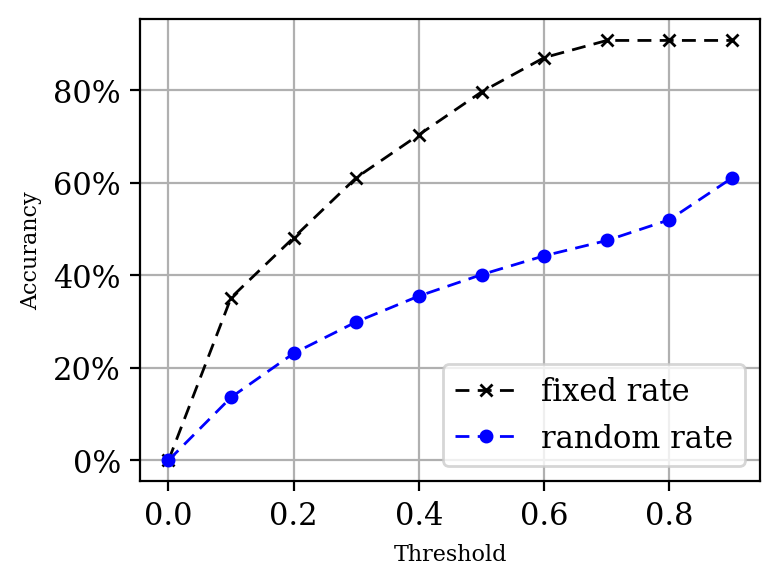

In [15]:
# Compare different datasets

fig, ax = plt.subplots(figsize=(4,3)) 
accurancy=[0.0, 35.18518518518518, 48.148148148148145, 61.111111111111114, 70.37037037037037, 
                  79.62962962962963, 87.03703703703704, 90.74074074074075, 90.74074074074075, 
                  90.74074074074075]
accurancy_random = [0.030326004548900685, 13.646702047005308, 23.15390447308567, 29.946929492039427, 35.526914329037155, 
             40.151630022744506, 44.21531463229719,
             47.52084912812737, 52.00909780136467,
             61.04624715693707]

#plot
plt.plot([num/10 for num in range(10)],accurancy, marker='x',markersize = 4, c='k',linestyle='-',linewidth=1, dashes=(5, 3),label='fixed rate')  
plt.plot([num/10 for num in range(10)],accurancy_random, marker='o',markersize = 4, c='b',linestyle='-',linewidth=1, dashes=(5, 3),label = 'random rate')  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold', fontsize=8)
plt.ylabel('Accurancy', fontsize=8)
plt.legend()
plt.grid()
plt.show()

# Classical ML， random rate dataset

In [16]:
# model
model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)

# train
reg = model.fit(X_train, y_train)

# predict
y_pred = reg.predict(X_test)

# accuracy
threshold = 0.05  
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 21.485974222896136
[0.0, 40.48521607278241, 59.7573919636088, 70.26535253980288, 77.16451857467779, 81.84988627748294, 84.80667172100075, 86.82335102350265, 88.26383623957543, 89.44655041698256, 90.18953752843063]


# Classical ML, combined (phase-change rate) dataset

In [17]:
current_dir = os.getcwd()

file_path = os.path.abspath('../linear/datasets/combined.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 0 to 178
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1790 non-null   float64
 1   output_rate                         1790 non-null   float64
 2   latency                             1790 non-null   float64
 3   firewall_instructions               1790 non-null   float64
 4   nf_router_instructions              1789 non-null   float64
 5   ndpi_stats_instructions             1789 non-null   float64
 6   payload_scan_instructions           1790 non-null   float64
 7   bridge_instructions                 1789 non-null   float64
 8   firewall_branches                   1790 non-null   float64
 9   nf_router_branches                  1789 non-null   float64
 10  ndpi_stats_branches                 1789 non-null   float64
 11  payload_scan_branches               1790 non

In [ ]:
df = data.dropna()

# Separate the features and target variable
X = df.drop(['input_rate',"output_rate"], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# accuracy
threshold = 0.05  
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

#  DNN, combined (phase-change rate) dataset

In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model with two hidden layers
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=0)

# Train
model.fit(X_train_scaled, y_train)

# Evaluate 
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training score:", train_score)
print("Testing score:", test_score)

# accuracy
y_pred = model.predict(X_test_scaled)
threshold = 0.05  
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)